In [1]:
# 绘制地图：图形化显示海地地震危机数据
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from pandas import DataFrame
from pandas import Series

%matplotlib inline

In [2]:
data = pd.read_csv('../data/haiti/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [3]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']].head() # 坐标信息和上传时间

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671


In [4]:
data['CATEGORY'].head() # 信号类型

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
Name: CATEGORY, dtype: object

In [5]:
data.describe() # 看看是否存在不合理数据

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [6]:
data = data[(data.LATITUDE > 18) &
            (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) &
            (data.LONGITUDE < -70) &
            data.CATEGORY.notnull()] # 数据清洗
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3569.000000,3569.000000,3569.000000
mean,2081.498459,18.592503,-72.424994
std,1170.311824,0.273695,0.291018
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524200,-72.417498
50%,2166.000000,18.539269,-72.335000
75%,3089.000000,18.561800,-72.293939
max,4052.000000,19.940630,-71.099489


In [7]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series): # 分类去重
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat): # 保留英语字段
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [8]:
all_cats = get_all_categories(data.CATEGORY)
english_mapping = dict(get_english(x) for x in all_cats)
print(all_cats[:5])
print(english_mapping['1d'])

['1. Urgences | Emergency', '1a. Highly vulnerable', '1b. Urgence medicale | Medical Emergency', '1c. Personnes prises au piege | People trapped', '1d. Incendie | Fire']
Fire


In [9]:
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))

In [10]:
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index,               
                        columns=code_index)
print(dummy_frame.info())
dummy_frame.head() # 每个用户的信息包含了哪些代码，特征处理常用技术。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 45 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
2a    3569 non-null float64
2b    3569 non-null float64
2c    3569 non-null float64
2d    3569 non-null float64
2e    3569 non-null float64
2f    3569 non-null float64
3     3569 non-null float64
3a    3569 non-null float64
3b    3569 non-null float64
3c    3569 non-null float64
3d    3569 non-null float64
3e    3569 non-null float64
4     3569 non-null float64
4a    3569 non-null float64
4c    3569 non-null float64
4e    3569 non-null float64
5     3569 non-null float64
5a    3569 non-null float64
5b    3569 non-null float64
5c    3569 non-null float64
5d    3569 non-null float64
5e    3569 non-null float64
6     3569 non-null float64
6a    3569 non-null float64
6b    3569 non-null float64
6c    3569 non-null float

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1
dummy_frame = dummy_frame.add_prefix('category_')
dummy_frame.head()

,category_1,category_1a,category_1b,category_1c,category_1d,category_2,category_2a,category_2b,category_2c,category_2d,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data = pd.merge(data, dummy_frame, left_index=True, right_index=True) # 书上的写法有问题，理论上根据索引合并，但怀疑pandas有bug。
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # 创建极球面投影的Basemap实例。
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # 绘制海岸线、州界、国界以及地图边界。
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

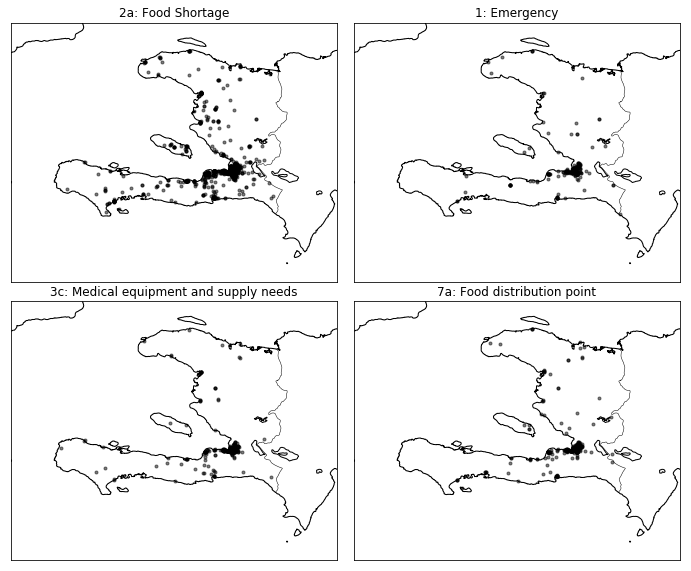

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
to_plot = ['2a', '1', '3c', '7a']
lllat=17.25
urlat=20.25
lllon=-75
urlon=-71
for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax,
                        lllat=lllat,
                        urlat=urlat,
                        lllon=lllon,
                        urlon=urlon)
    cat_data = data[data['category_%s' % code] == 1]
    # 计算地图的投影坐标。
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values) # 书上代码有问题，这里要用values获取数组
    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

Text(0.5,1,'2a: Food Shortage')

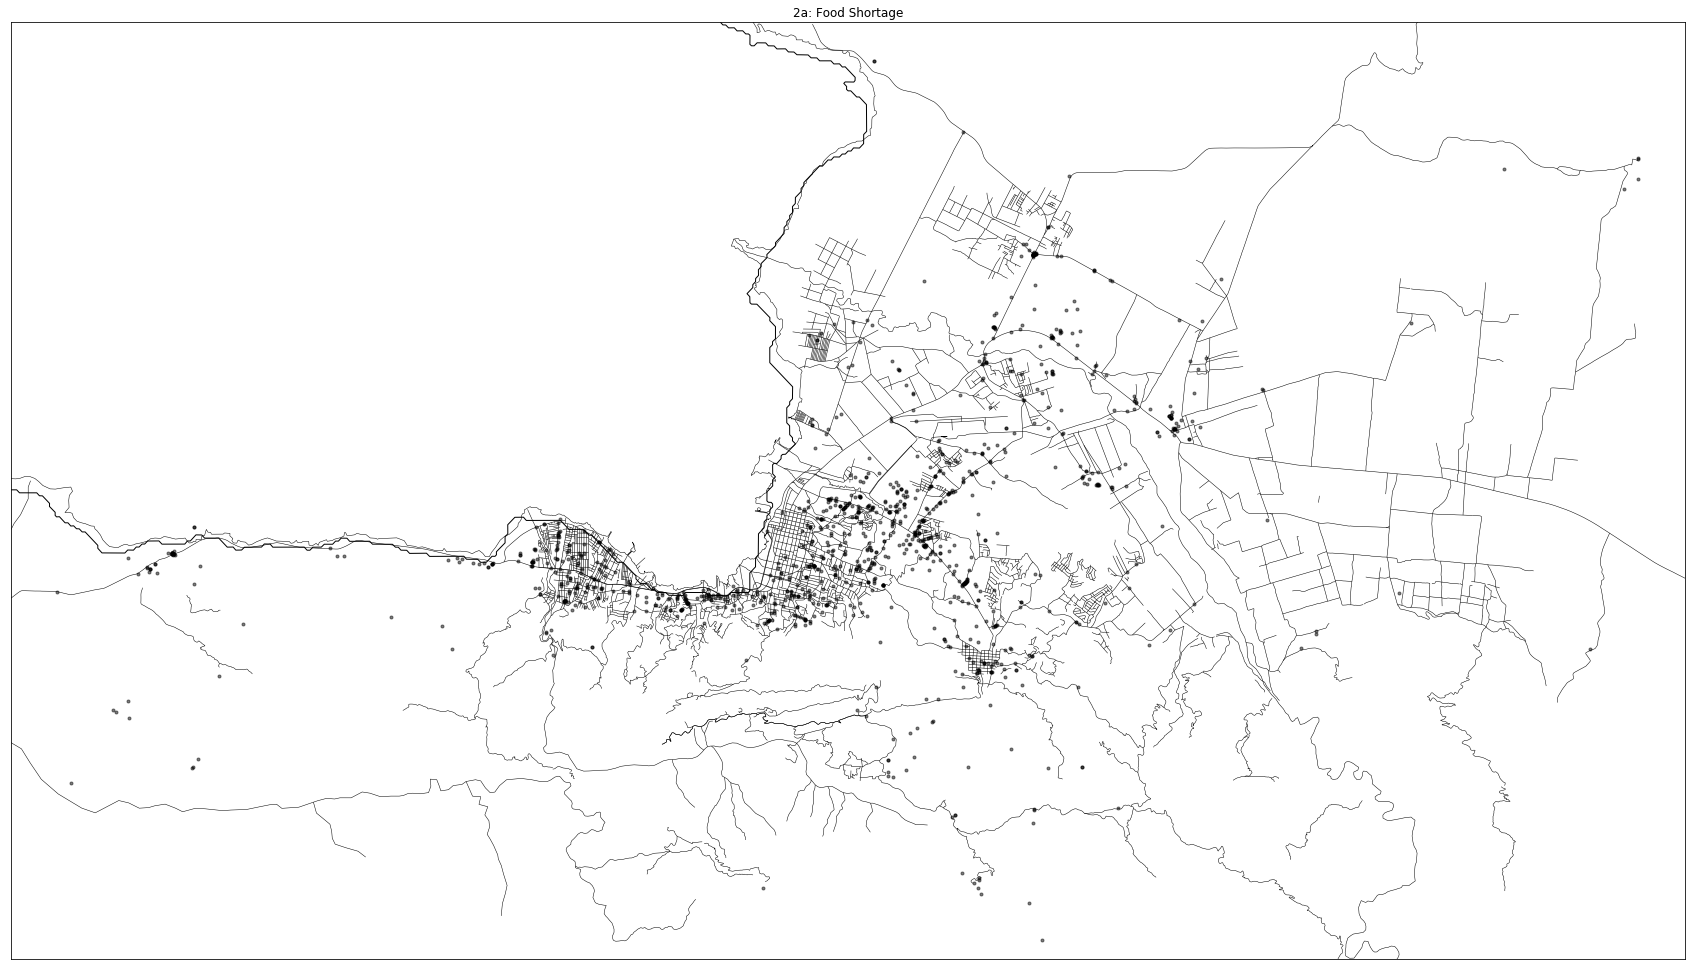

In [15]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(1,1,1)
lllat = 18.43
urlat = 18.69
lllon = -72.57
urlon = -72.08
m = basic_haiti_map(ax,lllat = lllat,urlat=urlat,lllon=lllon,urlon=urlon)
m.readshapefile('../data/haiti/PortAuPrince_Roads/PortAuPrince_Roads', 'roads') # 加载道路数据
code = '2a'
cat_data = data[data['category_%s' % code] == 1]
# print(cat_data)
x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values) # 书上代码有问题，这里要用values获取数组
m.plot(x, y, 'k.', alpha=0.5)
ax.set_title('%s: %s' % (code, english_mapping[code]))